In [2]:
pip install dataframe-image

You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


# Import library

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset

In [2]:
df = pd.read_csv('dataset_Delphes.csv').drop(['Unnamed: 0','flavorj1','flavorj2','flavorj3'], axis=1)

In [3]:
df.shape

(479728, 36)

# Histogram

In [4]:
low_level_input = ['njets','nbjets','ptj1','etaj1','phij1','ptj2','etaj2','phij2','ptj3','etaj3','phij3']
high_level_input = ['mj1','mj2','mj3','pt12','eta12','phi12','m12','dR12','dEta12','dPhi12','pt13','eta13','phi13','m13','dR13','dEta13','dPhi13','pt23','eta23','phi23','m23','dR23','dEta23','dPhi23']

low_level_df = df.drop(high_level_input, axis=1)
high_level_df = df.drop(low_level_input, axis=1)

low_level_unit = ['', '', 'GeV', '', '', 'GeV', '', '', 'GeV', '', '']
high_level_unit = ['GeV', 'GeV', 'GeV', 'GeV', '', '', 'GeV', '', '', '','GeV', '', '', 'GeV', '', '', '','GeV', '', '', 'GeV', '', '', '']

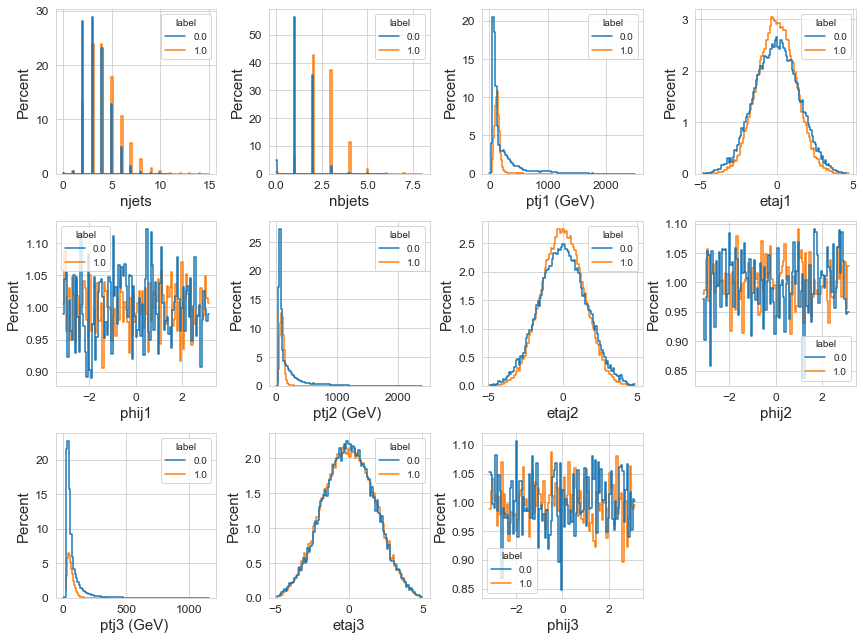

In [7]:
sns.set_style('whitegrid')
plt.rcParams['savefig.dpi'] = 600

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12,9))

palette ={0.0: "C0", 1.0: "C1"}

index = 0
for param, ax in zip(low_level_input, axs.ravel()):
    sns.histplot(ax=ax,  data=low_level_df, x=param, bins=100, common_bins=False, stat='percent', common_norm=False, hue='label', element='step',fill=False, palette=palette)
    #ax.set_title(param, fontweight='bold', size=12)
    ax.set_ylabel('Percent', fontsize = 15) # Y label
    ax.set_xlabel(param, fontsize = 15) # X label
    ax.tick_params(axis='both', labelsize = 12)
    if low_level_unit[index] != '':
        ax.set_xlabel(param +' '+'(' + low_level_unit[index] + ')'+' ', fontsize = 15) # X label
    index = index + 1
axs[2,3].remove()
fig.tight_layout()
plt.savefig('histrogram_lowlevel.jpg')

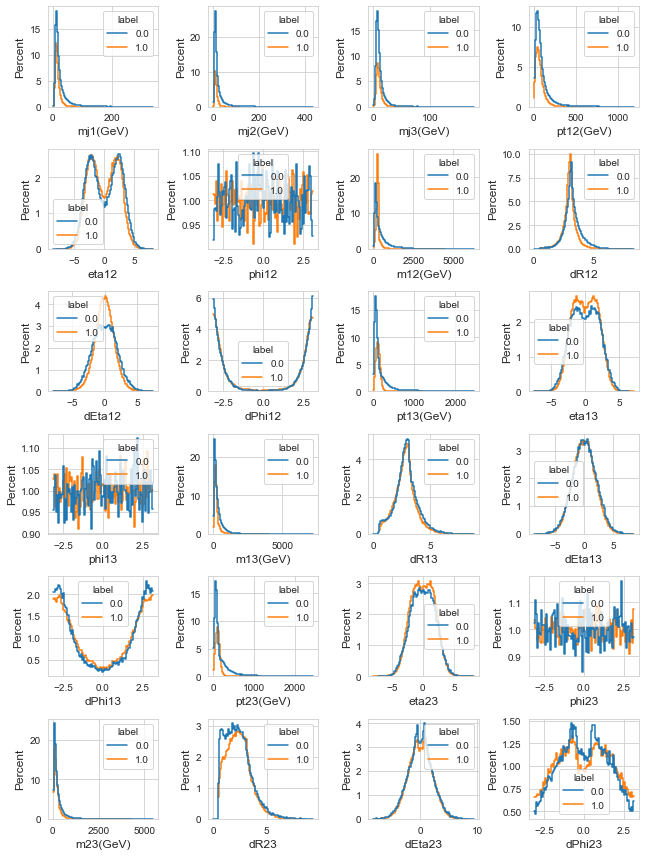

In [11]:
sns.set_style('whitegrid')
plt.rcParams['savefig.dpi'] = 600
#plt.rcParams.update({'font.size': 5})

fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(9,12))

palette ={0.0: "C0", 1.0: "C1"}

index = 0
for param, ax in zip(high_level_input, axs.ravel()):
    sns.histplot(ax=ax,  data=high_level_df, x=param, bins=100, common_bins=False, stat='percent', common_norm=False, hue='label', element='step',fill=False, palette=palette)
    #ax.set_title(param, fontweight='bold', size=12)
    ax.set_ylabel('Percent', fontsize = 12) # Y label
    ax.set_xlabel(param, fontsize = 12) # X label
    if high_level_unit[index] != '':
        ax.set_xlabel(param +'(' + high_level_unit[index] + ')', fontsize = 12) # X label
    index = index + 1
fig.tight_layout()
plt.savefig('histrogram_highlevel.jpg')

# Pearson Correlation heatmap

In [4]:
df_pearson = df.drop(['label'],axis=1)

In [5]:
corr = df_pearson.corr()*100
corr = corr.sort_index(axis=0)
corr = corr.sort_index(axis=1)
corr

,dEta12,dEta13,dEta23,dPhi12,dPhi13,dPhi23,dR12,dR13,dR23,eta12,...,phi23,phij1,phij2,phij3,pt12,pt13,pt23,ptj1,ptj2,ptj3
dEta12,100.000000,40.139796,-46.545668,-0.157730,-0.299037,-0.045954,-0.235229,0.730320,-0.281235,-1.337270,...,-0.106073,0.631930,0.510405,-0.212892,0.088507,0.432348,0.504580,0.485411,0.490483,-0.003665
dEta13,40.139796,100.000000,62.380618,-0.063788,-0.381489,-0.127220,-0.212005,0.633537,0.721885,31.579259,...,-0.898076,0.262168,-0.316471,-0.143801,-0.041736,0.246979,0.111032,0.171522,0.242009,-0.130824
dEta23,-46.545668,62.380618,100.000000,0.072957,-0.113466,-0.083723,-0.004137,-0.011003,0.937572,31.657320,...,-0.777326,-0.285910,-0.741367,0.042710,-0.115857,-0.130277,-0.323285,-0.248474,-0.184688,-0.123292
dPhi12,-0.157730,-0.063788,0.072957,100.000000,-44.310764,50.198644,-0.471236,-0.114966,0.142909,0.054244,...,0.166341,-0.645852,0.207723,0.176535,-0.091134,0.194067,0.129190,0.145582,0.176473,-0.112985
dPhi13,-0.299037,-0.381489,-0.113466,-44.310764,100.000000,-55.960431,0.306106,-0.166932,0.612709,-0.351420,...,0.125953,0.172475,0.388467,-0.375879,-0.186581,-0.074825,0.025454,-0.083531,-0.056663,0.207502
dPhi23,-0.045954,-0.127220,-0.083723,50.198644,-55.960431,100.000000,-0.094555,0.365807,-0.208607,-0.226777,...,0.168405,-0.127003,0.014999,0.172534,0.032712,-0.153776,-0.109796,-0.072360,-0.105809,-0.436106
dR12,-0.235229,-0.212005,-0.004137,-0.471236,0.306106,-0.094555,100.000000,7.112480,4.876022,0.033884,...,-0.350736,-0.268362,-0.748595,0.266452,-21.644890,3.932241,4.914956,2.247635,1.702072,-7.912738
dR13,0.730320,0.633537,-0.011003,-0.114966,-0.166932,0.365807,7.112480,100.000000,4.818377,-0.366753,...,-0.034014,-0.279342,-0.280735,-0.224845,2.633121,-17.680283,1.506459,-5.872219,-8.972010,-4.407960
dR23,-0.281235,0.721885,0.937572,0.142909,0.612709,-0.208607,4.876022,4.818377,100.000000,0.845563,...,0.345835,0.211429,-0.140540,0.248407,-9.656816,-8.266592,-26.576366,-18.668822,-14.712921,-15.634330
eta12,-1.337270,31.579259,31.657320,0.054244,-0.351420,-0.226777,0.033884,-0.366753,0.845563,100.000000,...,-0.198830,0.065238,-0.174900,-0.259282,-0.429710,-0.180692,-0.318942,-0.302024,-0.237299,-0.290351


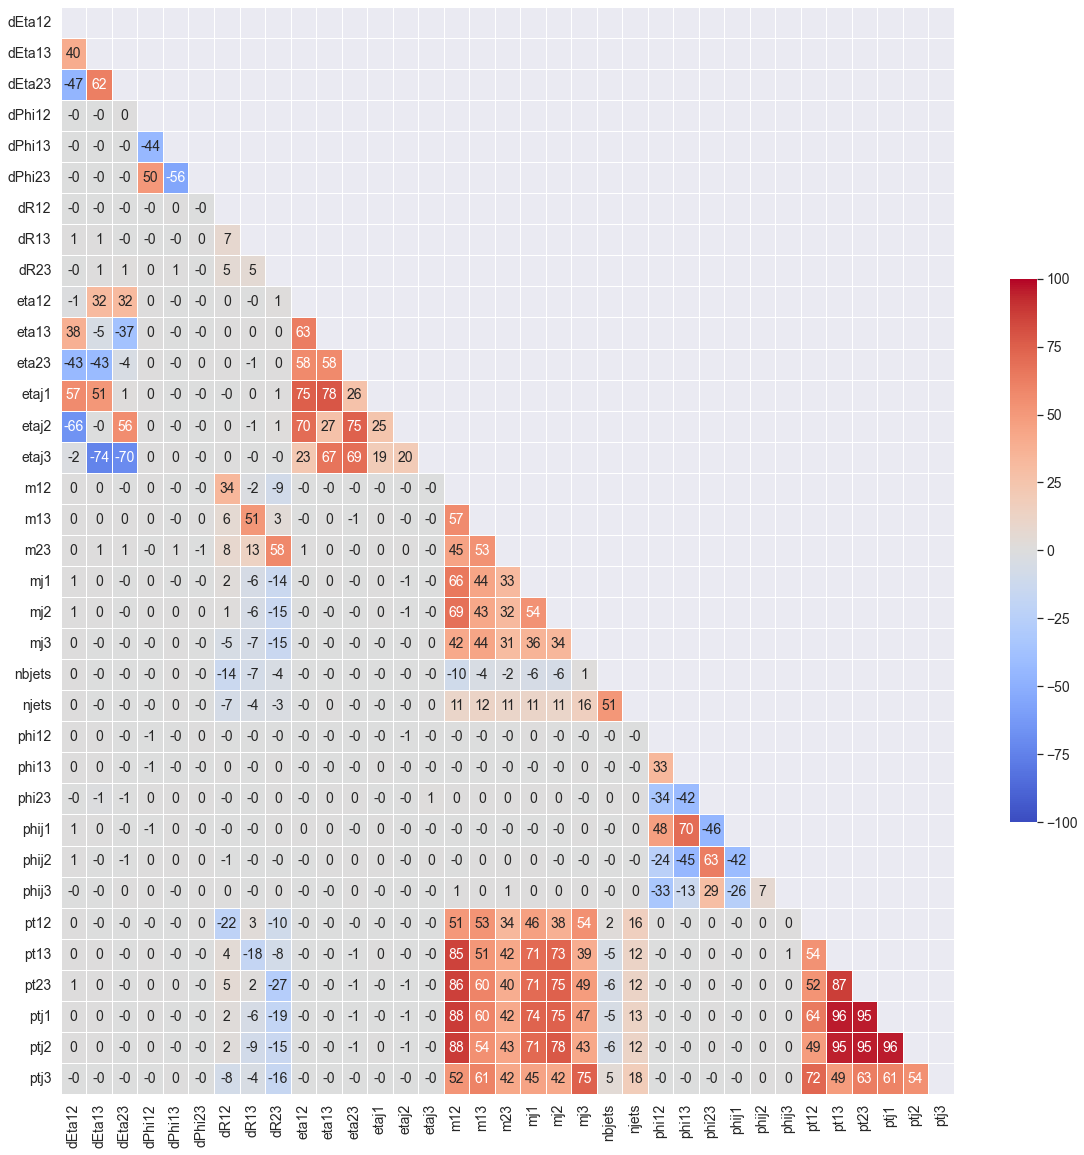

In [6]:
sns.set(rc = {'figure.figsize':(20,20)})
plt.rcParams['savefig.dpi'] = 600
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.color_palette("coolwarm", as_cmap=True)
ax = sns.heatmap(corr, mask=mask, vmin=-100, vmax=100, xticklabels=True, yticklabels=True, center=0, cmap=cmap, linewidths=1, annot=True, fmt='.0f', annot_kws={"size": 14}, cbar_kws={"shrink": .50})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('correlation_heatmap.jpg')

### Remove high level feature that highly correlated with low-level feature

In [5]:
corr_df = df.corr().abs()

In [6]:
high_corr=[]
for i in corr_df.columns:
    for j in corr_df.columns:
        if (corr_df[i][j]>0.9) & (corr_df[i][j]<1):
            high_corr.append([i,j])

In [7]:
high_corr

[['ptj1', 'ptj2'],
 ['ptj1', 'pt13'],
 ['ptj1', 'pt23'],
 ['ptj2', 'ptj1'],
 ['ptj2', 'pt13'],
 ['ptj2', 'pt23'],
 ['pt13', 'ptj1'],
 ['pt13', 'ptj2'],
 ['pt23', 'ptj1'],
 ['pt23', 'ptj2']]

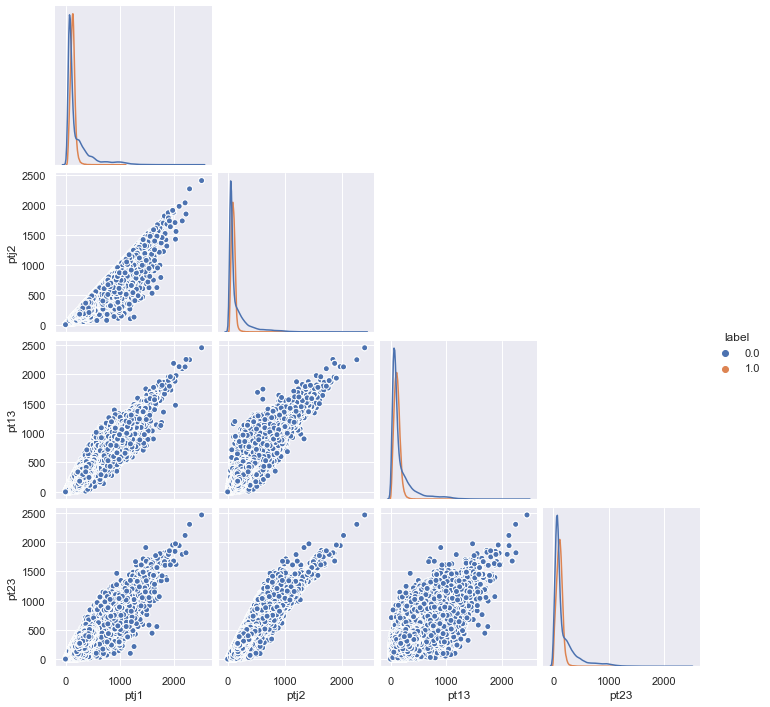

In [9]:
sns.pairplot(data=df,
             x_vars=['ptj1','ptj2','pt13','pt23'],
             y_vars=['ptj1','ptj2','pt13','pt23'],
             hue='label',
             plot_kws=dict(marker="o", linewidth=1),
             diag_kws=dict(fill=False),
             corner=True)

In [8]:
df = df.drop(['pt13','pt23'], axis=1)

In [9]:
df.shape

(479728, 34)

# ---------------------------------------------------------------------------------------------------------------

# Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df.label.value_counts()

0.0    279728
1.0    200000
Name: label, dtype: int64

In [12]:
train_df, test_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=42)

In [13]:
train_df.label.value_counts()

0.0    195809
1.0    140000
Name: label, dtype: int64

In [14]:
test_df.label.value_counts()

0.0    83919
1.0    60000
Name: label, dtype: int64

### Undersample Train set

In [15]:
count_0, count_1 = train_df.label.value_counts()

c0 = train_df[train_df['label']==0]
c1 = train_df[train_df['label']==1]

c0_sam = c0.sample(count_1)

undersampled_train = pd.concat([c0_sam, c1], axis=0)
X_train = undersampled_train.drop('label', axis=1)
y_train = undersampled_train['label']

In [16]:
y_train.value_counts()

0.0    140000
1.0    140000
Name: label, dtype: int64

In [17]:
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

### Standardize features

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

### convert standardized features from ndarray to dataframe 

In [19]:
X_train_std_df = pd.DataFrame(X_train_std, columns=[c for c in X_train.columns])
X_test_std_df = pd.DataFrame(X_test_std, columns=[c for c in X_test.columns])

# ---------------------------------------------------------------------------------------------------------------

# Import evaluation matrix functions 

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

# ---------------------------------------------------------------------------------------------------------------

# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
from sklearn import tree

In [22]:
# How to export dataframe as image
'''
import dataframe_image as dfi
dfi.export(rfe_result_dt, 'rfe_dt.png')
'''

"\nimport dataframe_image as dfi\ndfi.export(rfe_result_dt, 'rfe_dt.png')\n"

# Identify model's parameter

### min_samples_leaf 

In [24]:
min_samples_leaf = [0.1,0.05,0.025,0.0125]
train_scores, test_scores = list(), list()
train_scores1, test_scores1 = list(), list()

for i in min_samples_leaf:
    dt = DecisionTreeClassifier(criterion='gini',min_samples_leaf=i , random_state=1)
    dt.fit(X_train, y_train)
    
    train_ypred = dt.predict(X_train)
    train_ypredprob = dt.predict_proba(X_train)[:,1]
    train_acc = accuracy_score(y_train, train_ypred)
    train_auc = roc_auc_score(y_train, train_ypredprob)
    train_scores.append(train_acc)
    train_scores1.append(train_auc)
    
    test_ypred = dt.predict(X_test)
    test_ypredprob = dt.predict_proba(X_test)[:,1]
    test_acc = accuracy_score(y_test, test_ypred)
    test_auc = roc_auc_score(y_test, test_ypredprob)
    test_scores.append(test_acc)
    test_scores1.append(test_auc)

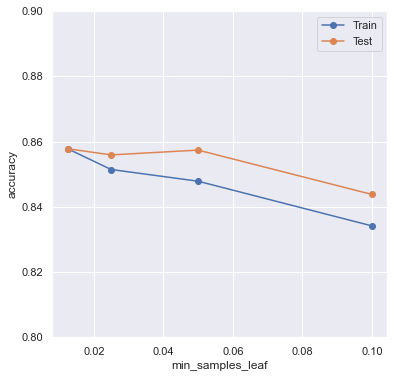

In [25]:
sns.set(rc = {'figure.figsize':(6,6)})

plt.plot(min_samples_leaf, train_scores, '-o', label='Train')
plt.plot(min_samples_leaf, test_scores, '-o', label='Test')
plt.ylim((0.8, 0.9))
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.legend()

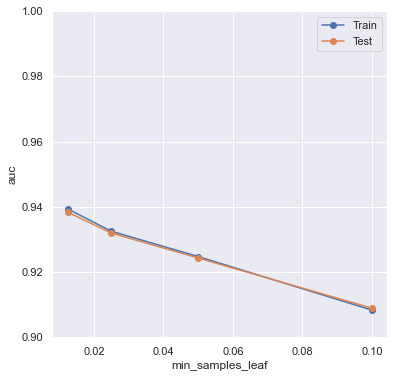

In [26]:
sns.set(rc = {'figure.figsize':(6,6)})

plt.plot(min_samples_leaf, train_scores1, '-o', label='Train')
plt.plot(min_samples_leaf, test_scores1, '-o', label='Test')
plt.ylim((0.9, 1.0))
plt.xlabel('min_samples_leaf')
plt.ylabel('auc')
plt.legend()

### max_depth 

In [85]:
max_depth = [n for n in range(2,21)]
train_acc_list_dt, test_acc_list_dt = list(), list()
train_auc_list_dt, test_auc_list_dt = list(), list()

for i in max_depth:
    dt = DecisionTreeClassifier(criterion='gini',max_depth=i , random_state=1)
    dt.fit(X_train, y_train)
    
    train_ypred = dt.predict(X_train)
    train_ypredprob = dt.predict_proba(X_train)[:,1]
    train_acc = accuracy_score(y_train, train_ypred)
    train_auc = roc_auc_score(y_train, train_ypredprob)
    train_acc_list_dt.append(train_acc)
    train_auc_list_dt.append(train_auc)
    
    test_ypred = dt.predict(X_test)
    test_ypredprob = dt.predict_proba(X_test)[:,1]
    test_acc = accuracy_score(y_test, test_ypred)
    test_auc = roc_auc_score(y_test, test_ypredprob)
    test_acc_list_dt.append(test_acc)
    test_auc_list_dt.append(test_auc)

[6.4 4.8]


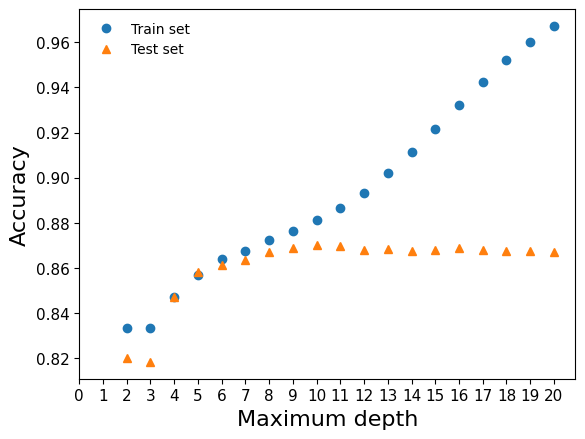

In [99]:
fig, ax = plt.subplots()
size = fig.get_size_inches()
print(size)
#or fig_width, fig_height = plt.gcf().get_size_inches()
#print(fig_width, fig_height)
plt.rcParams['savefig.dpi'] = 600
plt.style.use('default')
plt.plot(max_depth, train_scores_acc, marker='o', ls='', label='Train set')
plt.plot(max_depth, test_scores_acc, marker='^', ls='', label='Test set')
plt.xlabel('Maximum depth', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(ticks = [n for n in range(0, 21)], fontsize=11)
plt.yticks(fontsize=11)
plt.legend()
plt.legend(frameon=False)
plt.savefig('acc_vs_maxdepth.jpg')

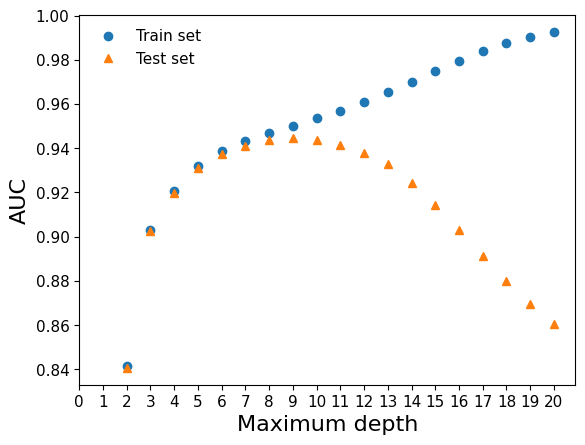

In [100]:
fig, ax = plt.subplots()
plt.rcParams['savefig.dpi'] = 600
plt.style.use('default')
plt.plot(max_depth, train_scores_auc, marker='o', ls='', label='Train set')
plt.plot(max_depth, test_scores_auc, marker='^', ls='', label='Test set')
plt.xlabel('Maximum depth', fontsize=16)
plt.ylabel('AUC', fontsize=16)
plt.xticks(ticks = [n for n in range(0, 21)], fontsize=11)
plt.yticks(fontsize=11)
plt.legend()
plt.legend(frameon=False, fontsize=11)
plt.savefig('auc_vs_maxdepth.jpg')

## RFE with Decision Tree 

In [23]:
from sklearn.feature_selection import RFE

In [24]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [25]:
rfe = RFE(estimator=dt, n_features_to_select=1, verbose=0)
rfe.fit(X_train, y_train)

RFE(estimator=DecisionTreeClassifier(max_depth=6, random_state=1),
    n_features_to_select=1)

In [26]:
rfe_result_dt = pd.DataFrame(data={'Feature':X_train.columns, 'Ranking':rfe.ranking_, 'Impurity-based feature importance': dt.feature_importances_*100})
rfe_result_dt = rfe_result_dt.sort_values(['Ranking','Impurity-based feature importance'], ascending=[True, False])

rfe_result_dt.head(10)

,Feature,Ranking,Impurity-based feature importance
1,nbjets,1,65.175149
3,ptj1,2,25.010623
17,m12,3,3.839290
0,njets,4,2.733389
7,ptj2,5,2.653813
8,etaj2,6,0.183720
2,mj1,7,0.175416
11,ptj3,8,0.080137
14,pt12,9,0.041937
18,dR12,10,0.033629


In [25]:
DT_top10 = pd.DataFrame(data={'Feature':['nbjets','ptj1','m12','njets','ptj2','etaj2','mj1','ptj3','pt12','dR12'],'Impurity-based feature importance':[0.6518,0.2501,0.0384,0.0273,0.0265,0.0018,0.0018,0.0008,0.0004,0.0003]})

In [26]:
#DT_top10 = rfe_result_dt.head(10)
DT_x_top10 = DT_top10['Feature'].values.tolist()
DT_imp_top10 = DT_top10['Impurity-based feature importance'].values.tolist()
#DT_imp_top10 = [round(num, 2) for num in DT_imp_top10]

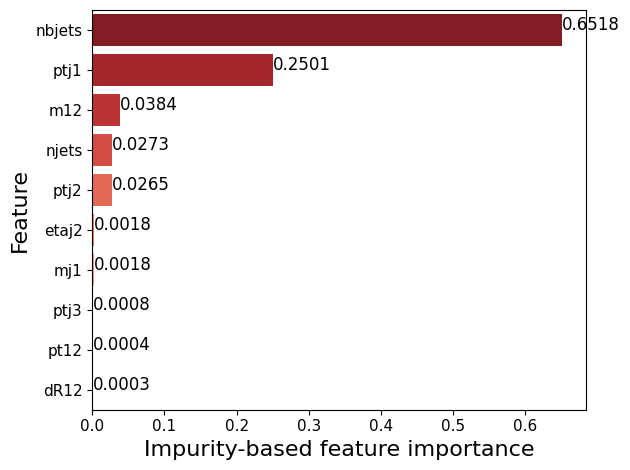

In [38]:
fig, ax = plt.subplots()
plt.rcParams['savefig.dpi'] = 600
plt.style.use('default')
palette = sns.color_palette(palette="Reds", n_colors=10)
palette.reverse()
sns.barplot(x='Impurity-based feature importance', y='Feature', data=DT_top10, palette=palette)
plt.xlabel('Impurity-based feature importance', fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

for i in range(10):
    text = ax.text(DT_imp_top10[i], i, DT_imp_top10[i], color="k", fontsize='large')
plt.tight_layout()        
plt.savefig('DT_featureimportance.jpg')

Warning The impurity-based feature importances computed on tree-based models suffer from two flaws that can lead to misleading conclusions. First they are computed on statistics derived from the training dataset and therefore do not necessarily inform us on which features are most important to make good predictions on held-out dataset. Secondly, they favor high cardinality features, that is features with many unique values. Permutation feature importance is an alternative to impurity-based feature importance that does not suffer from these flaws. These two methods of obtaining feature importance are explored in: Permutation Importance vs Random Forest Feature Importance (MDI).

# Evaluation metrics when train on all features

In [31]:
print(f'train accuracy: {accuracy_score(y_train, dt.predict(X_train))}')
print(f'test accuracy: {accuracy_score(y_test, dt.predict(X_test))}')
print(f'AUC: {roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])}')

train accuracy: 0.8624071428571428
test accuracy: 0.8630132227155553
AUC: 0.9373579672064729


# Find minimum number of features that results in maximum scores

In [32]:
dtn = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=1)

top10_features_dt = ['nbjets','ptj1','m12','njets','ptj2','etaj2','mj1','ptj3','pt12','dR12']
train_acc_dt, test_acc_dt, train_auc_dt, test_auc_dt = list(), list(), list(), list()
for i in range(10):
    select_features_dt = top10_features_dt[0:i+1]
    dtn.fit(X_train[select_features_dt],y_train)
    train_acc_dt.append(accuracy_score(y_train, dtn.predict(X_train[select_features_dt])))
    test_acc_dt.append(accuracy_score(y_test, dtn.predict(X_test[select_features_dt])))
    train_auc_dt.append(roc_auc_score(y_train, dtn.predict_proba(X_train[select_features_dt])[:,1]))
    test_auc_dt.append(roc_auc_score(y_test, dtn.predict_proba(X_test[select_features_dt])[:,1]))

### Accuracy 

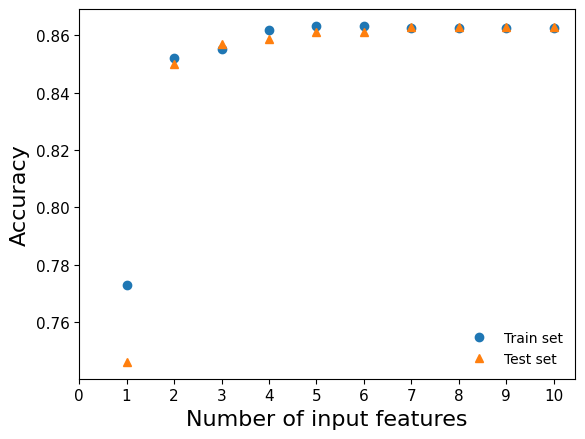

In [33]:
fig, ax = plt.subplots()
plt.rcParams['savefig.dpi'] = 600
plt.style.use('default')
plt.plot([n for n in range(1,11)], train_acc_dt, marker='o', ls='', label='Train set')
plt.plot([n for n in range(1,11)], test_acc_dt, marker='^', ls='', label='Test set')
plt.xlabel('Number of input features', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(ticks = [n for n in range(0, 11)], fontsize=11)
plt.yticks(fontsize=11)
#plt.ylim((0.8,0.9))
plt.legend()
plt.legend(frameon=False)
plt.savefig('DT_acc_vs_ninputfeatures.jpg')

### AUC 

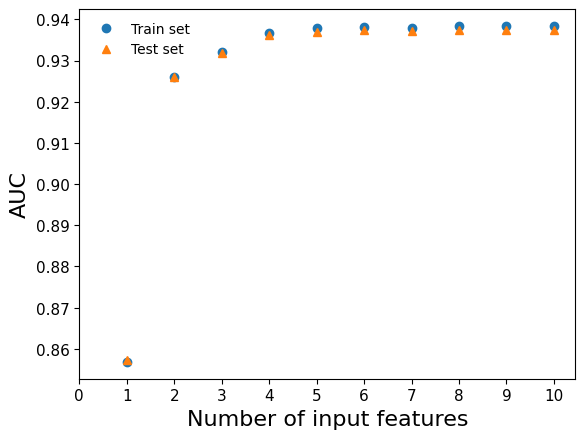

In [34]:
fig, ax = plt.subplots()
plt.rcParams['savefig.dpi'] = 600
plt.style.use('default')
plt.plot([n for n in range(1,11)], train_auc_dt, marker='o', ls='', label='Train set')
plt.plot([n for n in range(1,11)], test_auc_dt, marker='^', ls='', label='Test set')
plt.xlabel('Number of input features', fontsize=16)
plt.ylabel('AUC', fontsize=16)
plt.xticks(ticks = [n for n in range(0, 11)], fontsize=11)
plt.yticks(fontsize=11)
#plt.ylim((0.8,0.9))
plt.legend()
plt.legend(frameon=False)
plt.savefig('DT_auc_vs_ninputfeatures.jpg')

# Evaluation metrics when train on selected features

In [35]:
select_features = ['nbjets','ptj1','m12','njets','ptj2']

In [36]:
dtn = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=1)
dtn.fit(X_train[select_features], y_train)

print(f'train accuracy: {accuracy_score(y_train, dtn.predict(X_train[select_features]))}')
print(f'test accuracy: {accuracy_score(y_test, dtn.predict(X_test[select_features]))}')
print(f'train AUC: {roc_auc_score(y_train, dtn.predict_proba(X_train[select_features])[:,1])}')
print(f'test AUC: {roc_auc_score(y_test, dtn.predict_proba(X_test[select_features])[:,1])}')

train accuracy: 0.8630714285714286
test accuracy: 0.8612691861394256
train AUC: 0.9377919493622449
train AUC: 0.9369196854506529


## visualize decision tree 

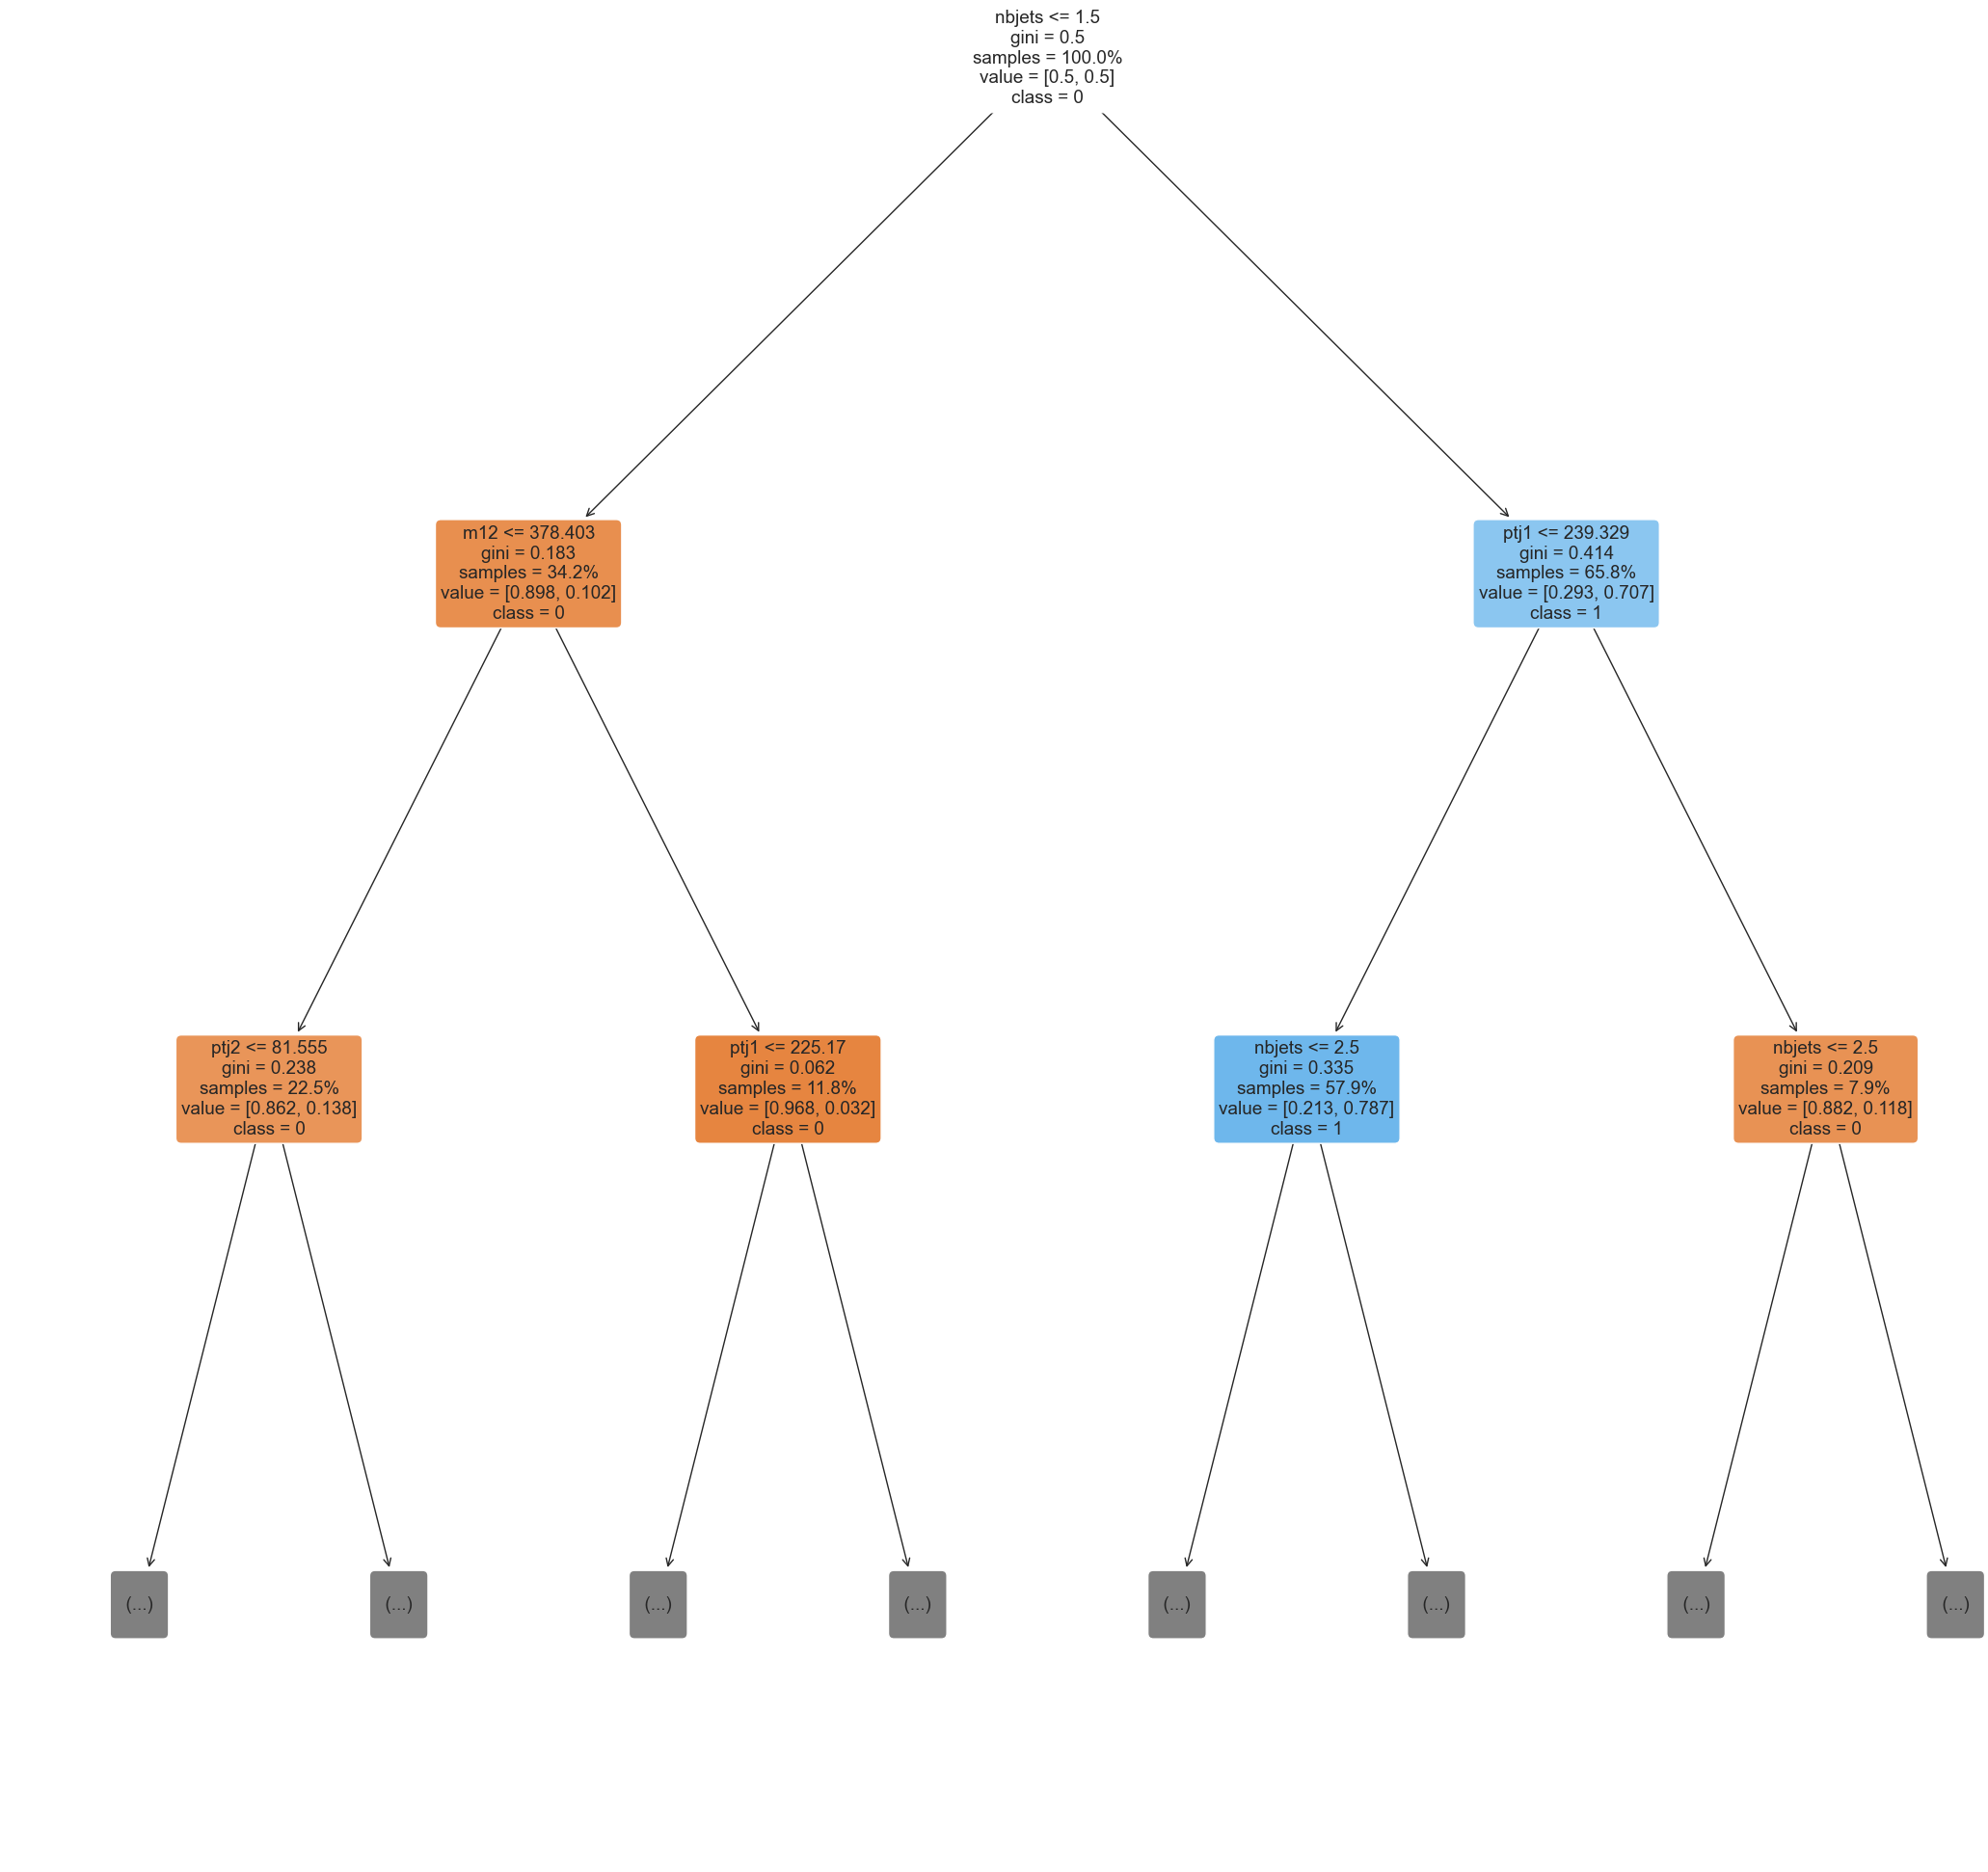

In [38]:
sns.set(rc = {'figure.figsize':(20,20)})
tree.plot_tree(dtn,
               max_depth = 2,
               feature_names=select_features,
               class_names=['0','1'],
               filled=True,
               rounded=True,
               proportion=True
               )
plt.savefig('DT_plot.jpg')

# ---------------------------------------------------------------------------------------------------------------

# Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Identify model's parameter

In [47]:
n_estimators = [10,15,20,25,50,75,100,125,150]
train_acc_rf, test_acc_rf = list(), list()
train_auc_rf, test_auc_rf = list(), list()
oob_rf = list()
for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i,
                                max_features='sqrt',
                                max_depth=6,
                                max_samples=None,
                                oob_score=True,
                                warm_start=False,
                                random_state=1)
    rf.fit(X_train, y_train)
    
    train_ypred = rf.predict(X_train)
    train_ypredprob = rf.predict_proba(X_train)[:,1]
    train_acc = accuracy_score(y_train, train_ypred)
    train_auc = roc_auc_score(y_train, train_ypredprob)
    train_acc_rf.append(train_acc)
    train_auc_rf.append(train_auc)
    
    test_ypred = rf.predict(X_test)
    test_ypredprob = rf.predict_proba(X_test)[:,1]
    test_acc = accuracy_score(y_test, test_ypred)
    test_auc = roc_auc_score(y_test, test_ypredprob)
    test_acc_rf.append(test_acc)
    test_auc_rf.append(test_auc)
    
    oob_rf.append(rf.oob_score_)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:549: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:549: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\skle

In [49]:
oob_rf

[0.8395535714285715,
 0.8469464285714285,
 0.8493107142857143,
 0.8493107142857143,
 0.8561035714285714,
 0.8574392857142857,
 0.8594071428571428,
 0.8595214285714285,
 0.8602464285714285]

## for paper submission 

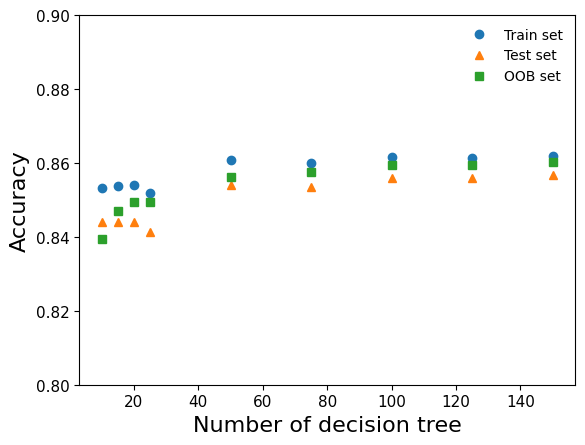

In [103]:
fig, ax = plt.subplots()
plt.rcParams['savefig.dpi'] = 600
plt.style.use('default')
plt.plot(n_estimators, train_acc_rf, marker='o', ls='', label='Train set')
plt.plot(n_estimators, test_acc_rf, marker='^', ls='', label='Test set')
plt.plot(n_estimators, oob_rf, marker='s', ls='', label='OOB set')
plt.xlabel('Number of decision tree', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim((0.8,0.9))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend()
plt.legend(frameon=False)
plt.savefig('RF_acc_vs_nestimators.jpg')

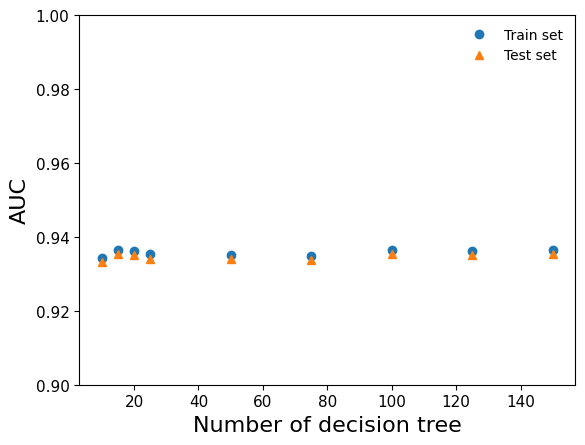

In [104]:
fig, ax = plt.subplots()
plt.rcParams['savefig.dpi'] = 600
plt.style.use('default')
plt.plot(n_estimators, train_auc_rf, marker='o', ls='', label='Train set')
plt.plot(n_estimators, test_auc_rf, marker='^', ls='', label='Test set')
plt.xlabel('Number of decision tree', fontsize=16)
plt.ylabel('AUC', fontsize=16)
plt.ylim((0.9,1.0))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend()
plt.legend(frameon=False)
plt.savefig('RF_auc_vs_nestimators.jpg')

### RFE with Random Forest

In [40]:
rf = RandomForestClassifier(n_estimators=50,
                            max_features='sqrt',
                            max_depth=6,
                            max_samples=None,
                            oob_score=True,
                            warm_start=False,
                            random_state=1)

rf.fit(X_train,y_train)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


RandomForestClassifier(max_depth=6, max_features='sqrt', n_estimators=50,
                       oob_score=True, random_state=1)

In [41]:
rfe = RFE(estimator=rf, n_features_to_select=10, verbose=0)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(max_depth=6, max_features='sqrt',
                                     n_estimators=50, oob_score=True,
                                     random_state=1),
    n_features_to_select=10)

In [42]:
rfe_result_rf = pd.DataFrame(data={'Feature':X_train.columns, 'ranking':rfe.ranking_, 'Impurity-based feature importance': rf.feature_importances_})
rfe_result_rf = rfe_result_rf.sort_values(['ranking','Impurity-based feature importance'], ascending=[True, False])

In [43]:
rfe_result_rf.head(10)

,Feature,ranking,Impurity-based feature importance
1,nbjets,1,0.432813
3,ptj1,1,0.155807
7,ptj2,1,0.122881
17,m12,1,0.106027
0,njets,1,0.045423
11,ptj3,1,0.026422
18,dR12,1,0.022699
2,mj1,1,0.022323
6,mj2,1,0.020857
23,m13,1,0.016372


In [28]:
RF_top10 = pd.DataFrame(data={'Feature':['nbjets','ptj1','ptj2','m12','njets','ptj3','dR12','mj1','mj2','m13'],'Impurity-based feature importance':[0.4328,0.1558,0.1229,0.1060,0.0454,0.0264,0.0227,0.0223,0.0209,0.0164]})

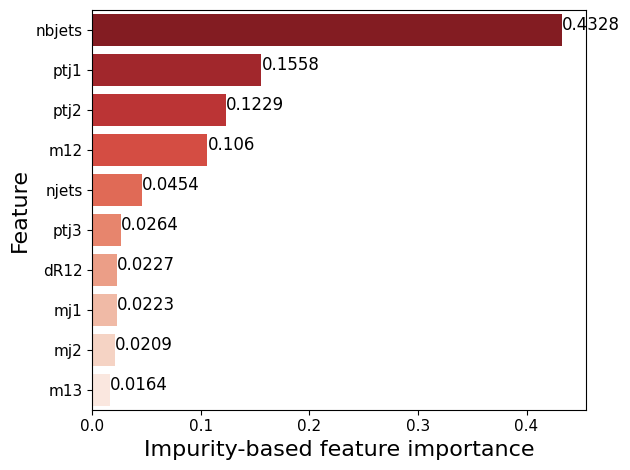

In [39]:
#RF_top10 = rfe_result_rf.head(10)
RF_x_top10 = RF_top10['Feature'].values.tolist()
RF_imp_top10 = RF_top10['Impurity-based feature importance'].values.tolist()
#RF_imp_top10 = [round(num, 2) for num in RF_imp_top10]

fig, ax = plt.subplots()
plt.rcParams['savefig.dpi'] = 600
plt.style.use('default')
palette = sns.color_palette(palette="Reds", n_colors=10)
palette.reverse()
sns.barplot(x='Impurity-based feature importance', y='Feature', data=RF_top10, palette=palette)
plt.xlabel('Impurity-based feature importance', fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

for i in range(10):
    text = ax.text(RF_imp_top10[i], i, RF_imp_top10[i], color="k", fontsize='large')
plt.tight_layout()        
plt.savefig('RF_featureimportance.jpg')

# Find minimum number of features that results in maximum scores

In [47]:
rfn = RandomForestClassifier(n_estimators=50,
                            max_features='sqrt',
                            max_depth=6,
                            max_samples=None,
                            oob_score=True,
                            warm_start=False,
                            random_state=1
                            )

top10_features_rf = ['nbjets','ptj1','ptj2','m12','njets','ptj3','dR12','mj1','mj2','m13']
train_acc_list, test_acc_list, train_auc_list, test_auc_list, oob_list = list(), list(), list(), list(), list()
for i in range(10):
    select_features_rf = top10_features_rf[0:i+1]
    rfn.fit(X_train[select_features_rf],y_train)
    train_acc_list.append(accuracy_score(y_train, rfn.predict(X_train[select_features_rf])))
    test_acc_list.append(accuracy_score(y_test, rfn.predict(X_test[select_features_rf])))
    train_auc_list.append(roc_auc_score(y_train, rfn.predict_proba(X_train[select_features_rf])[:,1]))
    test_auc_list.append(roc_auc_score(y_test, rfn.predict_proba(X_test[select_features_rf])[:,1]))
    oob_list.append(rfn.oob_score_)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feat

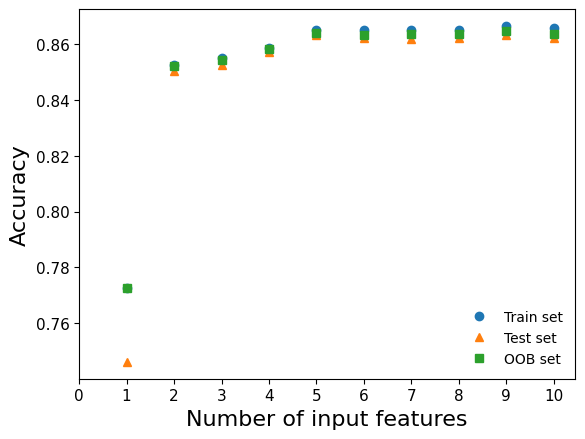

In [48]:
fig, ax = plt.subplots()
plt.rcParams['savefig.dpi'] = 600
plt.style.use('default')
plt.plot([n for n in range(1,11)], train_acc_list, marker='o', ls='', label='Train set')
plt.plot([n for n in range(1,11)], test_acc_list, marker='^', ls='', label='Test set')
plt.plot([n for n in range(1,11)], oob_list, marker='s', ls='', label='OOB set')
plt.xlabel('Number of input features', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
#plt.ylim((0.8,0.9))
plt.xticks([n for n in range(11)],fontsize=11)
plt.yticks(fontsize=11)
plt.legend()
plt.legend(frameon=False)
plt.savefig('RF_acc_vs_ninputfeatures.jpg')

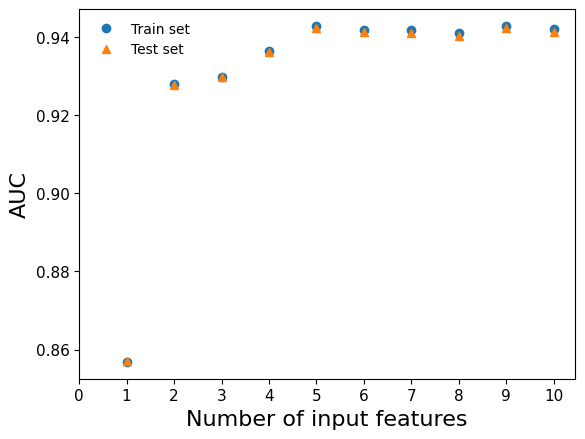

In [49]:
fig, ax = plt.subplots()
plt.rcParams['savefig.dpi'] = 600
plt.style.use('default')
plt.plot([n for n in range(1,11)], train_auc_list, marker='o', ls='', label='Train set')
plt.plot([n for n in range(1,11)], test_auc_list, marker='^', ls='', label='Test set')
plt.xlabel('Number of input features', fontsize=16)
plt.ylabel('AUC', fontsize=16)
#plt.ylim((0.8,0.9))
plt.xticks([n for n in range(11)],fontsize=11)
plt.yticks(fontsize=11)
plt.legend()
plt.legend(frameon=False)
plt.savefig('RF_auc_vs_ninputfeatures.jpg')

# Evaluation metrics when train on all features

In [50]:
rf = RandomForestClassifier(n_estimators=50,
                            max_features='sqrt',
                            max_depth=6,
                            max_samples=None,
                            oob_score=True,
                            warm_start=False,
                            random_state=1)
rf.fit(X_train, y_train)
print(f'train accuracy: {accuracy_score(y_train, rf.predict(X_train))}')
print(f'test accuracy: {accuracy_score(y_test, rf.predict(X_test))}')
print(f'train AUC: {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}')
print(f'test AUC: {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}')
print(f'OOB: {rf.oob_score_}')

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


train accuracy: 0.859475
test accuracy: 0.8534870308993253
train AUC: 0.9345997847959184
test AUC: 0.9338440035430992
OOB: 0.8562535714285714


# Evaluation matrixs when train on selected features

In [28]:
select_features_rf = ['nbjets','ptj1','ptj2','m12','njets']
rfn = RandomForestClassifier(n_estimators=50,
                            max_features='sqrt',
                            max_depth=6,
                            max_samples=None,
                            oob_score=True,
                            warm_start=False,
                            random_state=1
                            )
rfn.fit(X_train[select_features_rf],y_train)
print(f'train accuracy: {accuracy_score(y_train, rfn.predict(X_train[select_features_rf]))}')
print(f'test accuracy: {accuracy_score(y_test, rfn.predict(X_test[select_features_rf]))}')
print(f'train AUC: {roc_auc_score(y_train, rfn.predict_proba(X_train[select_features_rf])[:,1])}')
print(f'test AUC: {roc_auc_score(y_test, rfn.predict_proba(X_test[select_features_rf])[:,1])}')
print(f'OOB: {rfn.oob_score_}')

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


train accuracy: 0.8630464285714285
test accuracy: 0.8592541638004711
train AUC: 0.9430613639540817
test AUC: 0.9423426763704683
OOB: 0.8629321428571428


# ---------------------------------------------------------------------------------------------------------------

# Adaboost (Adaptive Boosting)

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. 

In [29]:
from sklearn.ensemble import AdaBoostClassifier

# Identify model's parameter

ลองใช้ max_depth ค่าอื่น นอกจากนี้ยังมีตัวแปรอื่นคือ learning_rate n_estimators

In [77]:
max_depth = [n for n in range(1,7)]
train_acc_ada, test_acc_ada = list(), list()
train_auc_ada, test_auc_ada = list(), list()

for i in max_depth:
    ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth= i , random_state=1),n_estimators=50,random_state=1)
    
    ada.fit(X_train, y_train)
    
    train_ypred = ada.predict(X_train)
    train_ypredprob = ada.predict_proba(X_train)[:,1]
    train_acc = accuracy_score(y_train, train_ypred)
    train_auc = roc_auc_score(y_train, train_ypredprob)
    train_acc_ada.append(train_acc)
    train_auc_ada.append(train_auc)
    
    test_ypred = ada.predict(X_test)
    test_ypredprob = ada.predict_proba(X_test)[:,1]
    test_acc = accuracy_score(y_test, test_ypred)
    test_auc = roc_auc_score(y_test, test_ypredprob)
    test_acc_ada.append(test_acc)
    test_auc_ada.append(test_auc)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but A

## for paper submission 

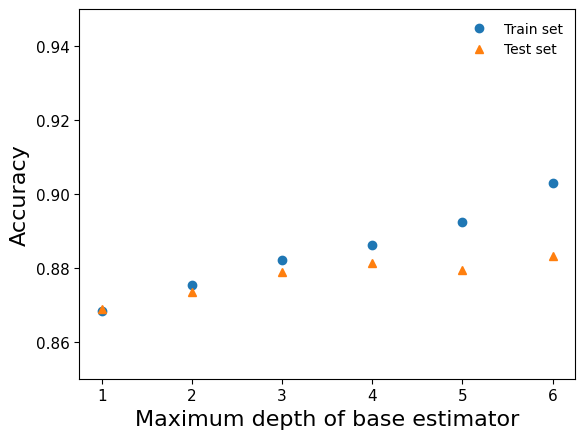

In [112]:
fig, ax = plt.subplots()
plt.rcParams['savefig.dpi'] = 600
plt.style.use('default')
plt.plot(max_depth, train_acc_ada, marker='o', ls='', label='Train set')
plt.plot(max_depth, test_acc_ada, marker='^', ls='', label='Test set')
plt.xlabel('Maximum depth of base estimator', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim((0.85,0.95))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend()
plt.legend(frameon=False)
plt.savefig('ADA_acc_vs_max_depth.jpg')

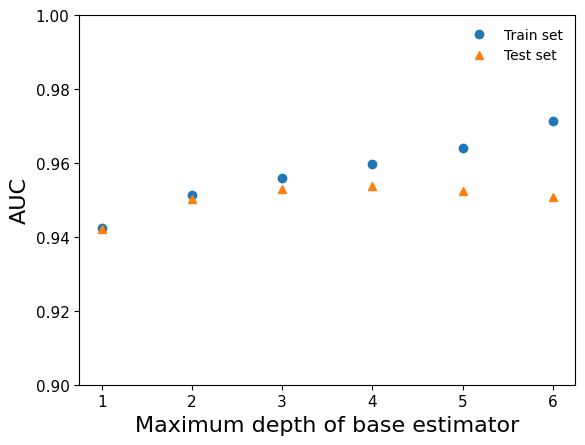

In [113]:
fig, ax = plt.subplots()
plt.rcParams['savefig.dpi'] = 600
plt.style.use('default')
plt.plot(max_depth, train_auc_ada, marker='o', ls='', label='Train set')
plt.plot(max_depth, test_auc_ada, marker='^', ls='', label='Test set')
plt.xlabel('Maximum depth of base estimator', fontsize=16)
plt.ylabel('AUC', fontsize=16)
plt.ylim((0.9,1.0))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend()
plt.legend(frameon=False)
plt.savefig('ADA_auc_vs_max_depth.jpg')

# Evaluation metrics when train on all features

In [30]:
adan = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3 , random_state=1),n_estimators=50,random_state=1)
adan.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   random_state=1)

In [31]:
print(f'train accuracy: {accuracy_score(y_train, adan.predict(X_train))}')
print(f'test accuracy: {accuracy_score(y_test, adan.predict(X_test))}')
print(f'train AUC: {roc_auc_score(y_train, adan.predict_proba(X_train)[:,1])}')
print(f'test AUC: {roc_auc_score(y_test, adan.predict_proba(X_test)[:,1])}')

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


train accuracy: 0.8803892857142858


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


test accuracy: 0.8778826979064612


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


train AUC: 0.9551782379846938


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


test AUC: 0.9521351254384187


### RFE with Adaptive Boosting

In [55]:
rfe = RFE(estimator=adan, n_features_to_select=10, verbose=0)
rfe.fit(X_train, y_train)

RFE(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                       random_state=1),
                                 random_state=1),
    n_features_to_select=10)

In [56]:
rfe_result_ada = pd.DataFrame(data={'Feature':X_train.columns, 'ranking':rfe.ranking_, 'Impurity-based feature importance': adan.feature_importances_})
rfe_result_ada = rfe_result_ada.sort_values(['ranking','Impurity-based feature importance'], ascending=[True, False])

In [57]:
rfe_result_ada.head(10)

,Feature,ranking,Impurity-based feature importance
3,ptj1,1,0.125497
17,m12,1,0.108270
0,njets,1,0.102721
1,nbjets,1,0.096755
11,ptj3,1,0.050624
2,mj1,1,0.046965
7,ptj2,1,0.046818
10,mj3,1,0.030762
14,pt12,1,0.030568
23,m13,1,0.026855


In [31]:
ADA_top10 = pd.DataFrame(data={'Feature':['ptj1','m12','njets','nbjets','ptj3','mj1','ptj2','mj3','pt12','m13'],'Impurity-based feature importance':[0.1255,0.1083,0.1027,0.0968,0.0506,0.0470,0.0468,0.0308,0.0306,0.0269]})

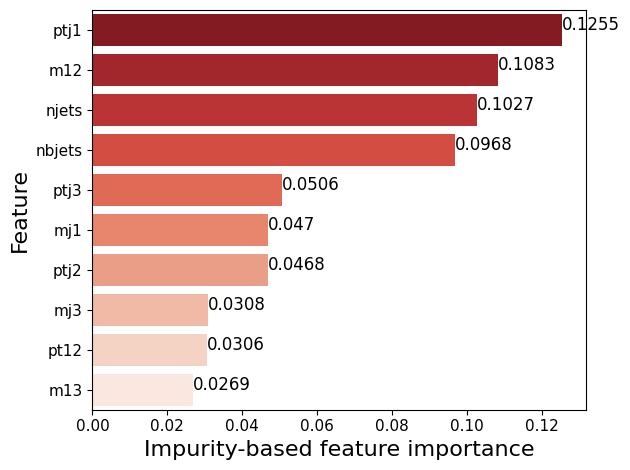

In [40]:
#ADA_top10 = rfe_result_ada.head(10)
ADA_x_top10 = ADA_top10['Feature'].values.tolist()
ADA_imp_top10 = ADA_top10['Impurity-based feature importance'].values.tolist()
#ADA_imp_top10 = [round(num, 2) for num in ADA_imp_top10]

fig, ax = plt.subplots()
plt.rcParams['savefig.dpi'] = 600
plt.style.use('default')
palette = sns.color_palette("Reds", n_colors=10)
palette.reverse()
sns.barplot(x='Impurity-based feature importance', y='Feature', data=ADA_top10, palette=palette)
plt.xlabel('Impurity-based feature importance', fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

for i in range(10):
    text = ax.text(ADA_imp_top10[i], i, ADA_imp_top10[i], color="k", fontsize='large')
plt.tight_layout()        
plt.savefig('ADA_featureimportance.jpg')

# Find minimum number of features that results in maximum scores

In [62]:
adan = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3 , random_state=1),n_estimators=50,random_state=1)

top10_features_ada = ['ptj1','m12','njets','nbjets','ptj3','mj1','ptj2','mj3','pt12','m13']
train_acc_list_ada, test_acc_list_ada, train_auc_list_ada, test_auc_list_ada = list(), list(), list(), list()
for i in range(10):
    select_features_ada = top10_features_ada[0:i+1]
    adan.fit(X_train[select_features_ada],y_train)
    train_acc_list_ada.append(accuracy_score(y_train, adan.predict(X_train[select_features_ada])))
    test_acc_list_ada.append(accuracy_score(y_test, adan.predict(X_test[select_features_ada])))
    train_auc_list_ada.append(roc_auc_score(y_train, adan.predict_proba(X_train[select_features_ada])[:,1]))
    test_auc_list_ada.append(roc_auc_score(y_test, adan.predict_proba(X_test[select_features_ada])[:,1]))

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but A

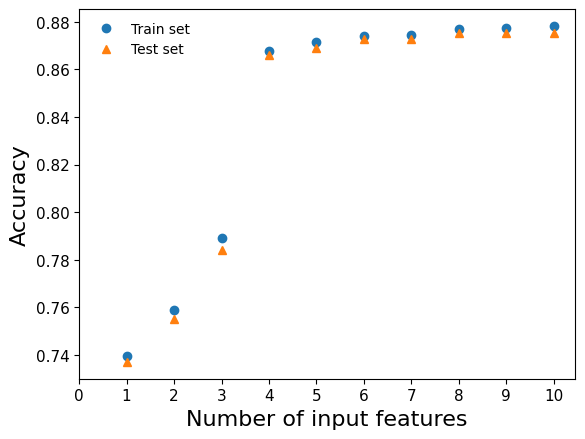

In [63]:
fig, ax = plt.subplots()
plt.rcParams['savefig.dpi'] = 600
plt.style.use('default')
plt.plot([n for n in range(1,11)], train_acc_list_ada, marker='o', ls='', label='Train set')
plt.plot([n for n in range(1,11)], test_acc_list_ada, marker='^', ls='', label='Test set')
plt.xlabel('Number of input features', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
#plt.ylim((0.8,0.9))
plt.xticks([n for n in range(11)],fontsize=11)
plt.yticks(fontsize=11)
plt.legend()
plt.legend(frameon=False)
plt.savefig('ADA_acc_vs_ninputfeatures.jpg')

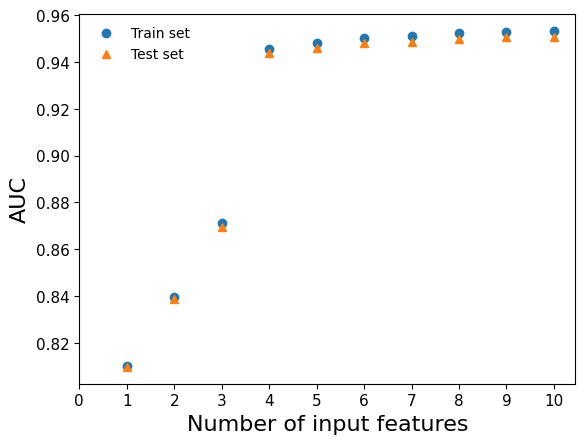

In [64]:
fig, ax = plt.subplots()
plt.rcParams['savefig.dpi'] = 600
plt.style.use('default')
plt.plot([n for n in range(1,11)], train_auc_list_ada, marker='o', ls='', label='Train set')
plt.plot([n for n in range(1,11)], test_auc_list_ada, marker='^', ls='', label='Test set')
plt.xlabel('Number of input features', fontsize=16)
plt.ylabel('AUC', fontsize=16)
#plt.ylim((0.8,0.9))
plt.xticks([n for n in range(11)],fontsize=11)
plt.yticks(fontsize=11)
plt.legend()
plt.legend(frameon=False)
plt.savefig('ADA_auc_vs_ninputfeatures.jpg')

# Evaluation metrics when train on selected features

In [65]:
select_features_ada = ['ptj1','m12','njets','nbjets','ptj3','mj1','ptj2','mj3']
adan = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3 , random_state=1),n_estimators=50,random_state=1)
adan.fit(X_train[select_features_ada],y_train)
print(f'train accuracy: {accuracy_score(y_train, adan.predict(X_train[select_features_ada]))}')
print(f'test accuracy: {accuracy_score(y_test, adan.predict(X_test[select_features_ada]))}')
print(f'train AUC: {roc_auc_score(y_train, adan.predict_proba(X_train[select_features_ada])[:,1])}')
print(f'test AUC: {roc_auc_score(y_test, adan.predict_proba(X_test[select_features_ada])[:,1])}')

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


train accuracy: 0.8768857142857143


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


test accuracy: 0.8751103051021756


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


train AUC: 0.9524360805612245


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


test AUC: 0.9499291474517095


# ---------------------------------------------------------------------------------------------------------------

# Neural Network

In [32]:
import tensorflow as tf

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

In [30]:
def create_model(nn1=100, nn2=50, activation='relu', optimizer='sgd', input_shape=33):
    
    # Create model
    model = Sequential()
    model.add(Dense(nn1, activation=activation, input_shape=(input_shape,)))
    model.add(Dense(nn2, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy','AUC']
    )
    return model

In [32]:
NN = KerasClassifier(build_fn = create_model, epochs=20)

In [39]:
callback = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, mode='min', verbose=1, restore_best_weights=True)

In [38]:
NN_training = NN.fit(X_train_std_df, y_train, validation_data=(X_test_std_df, y_test), callbacks=[callback], verbose=1)

Epoch 1/20
8750/8750 [==============================] - 10s 1ms/step - loss: 0.3533 - accuracy: 0.8447 - auc: 0.9237 - val_loss: 0.3408 - val_accuracy: 0.8457 - val_auc: 0.9383
Epoch 2/20
8750/8750 [==============================] - 9s 1ms/step - loss: 0.3060 - accuracy: 0.8682 - auc: 0.9429 - val_loss: 0.3082 - val_accuracy: 0.8657 - val_auc: 0.9443
Epoch 3/20
8750/8750 [==============================] - 11s 1ms/step - loss: 0.2939 - accuracy: 0.8733 - auc: 0.9473 - val_loss: 0.3143 - val_accuracy: 0.8617 - val_auc: 0.9474
Epoch 4/20
8750/8750 [==============================] - 11s 1ms/step - loss: 0.2883 - accuracy: 0.8753 - auc: 0.9493 - val_loss: 0.2989 - val_accuracy: 0.8688 - val_auc: 0.9490
Epoch 5/20
8750/8750 [==============================] - 11s 1ms/step - loss: 0.2849 - accuracy: 0.8762 - auc: 0.9504 - val_loss: 0.2960 - val_accuracy: 0.8700 - val_auc: 0.9494
Epoch 6/20
8750/8750 [==============================] - 13s 1ms/step - loss: 0.2817 - accuracy: 0.8773 - auc: 0.9515

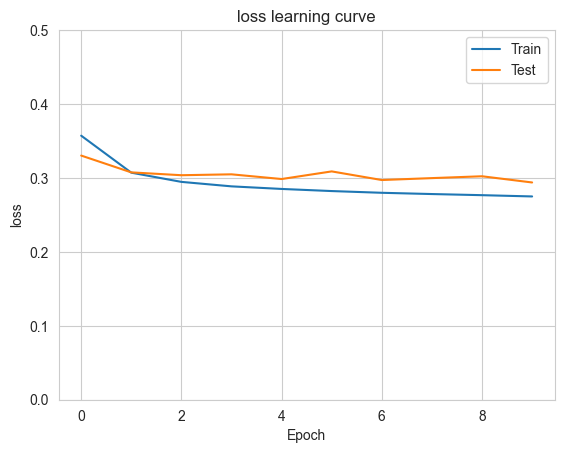

In [132]:
fig, ax = plt.subplots()
plt.rcParams['savefig.dpi'] = 600
plt.style.use('default')
plt.plot(NN_training.history['loss'], marker='o', ls='', label='Train set')
plt.plot(NN_training.history['val_loss'], marker='^', ls='', label='Test set')
plt.ylim(0,0.5)
plt.ylabel('loss', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.legend(frameon=False)
plt.savefig('loss_curve')

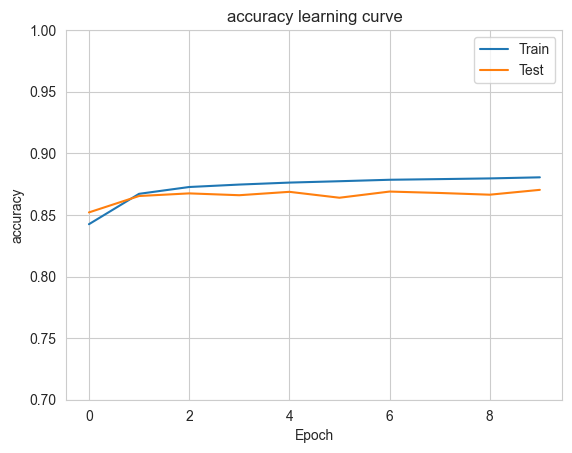

In [133]:
sns.set_style('whitegrid')
plt.figure()
plt.plot(NN_training.history['accuracy'])
plt.plot(NN_training.history['val_accuracy'])
plt.ylim(0.7,1)
plt.title('accuracy learning curve')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

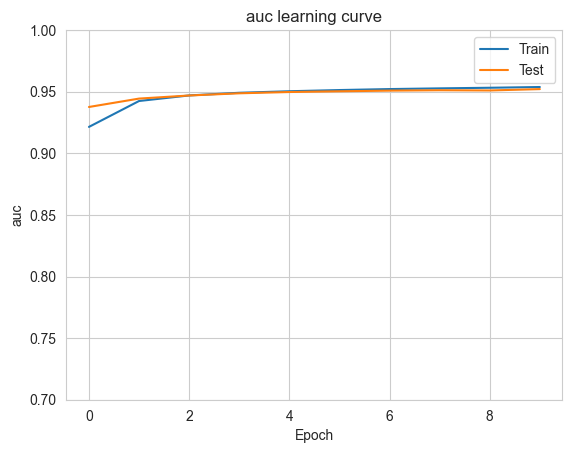

In [134]:
sns.set_style('whitegrid')
plt.figure()
plt.plot(NN_training.history['auc'])
plt.plot(NN_training.history['val_auc'])
plt.ylim(0.7,1)
plt.title('auc learning curve')
plt.ylabel('auc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

## Permutation Importance

Permutation feature importance is a model inspection technique that can be used for any fitted estimator when the data is tabular.

Warning Features that are deemed of low importance for a bad model (low cross-validation score) could be very important for a good model. Therefore it is always important to evaluate the predictive power of a model using a held-out set (or better with cross-validation) prior to computing importances. Permutation importance does not reflect to the intrinsic predictive value of a feature by itself but how important this feature is for a particular model.

In [34]:
from sklearn.inspection import permutation_importance

In [74]:
pi_NN = permutation_importance(NN, X_test_std_df, y_test, random_state=42, scoring='roc_auc')

In [114]:
pi_NN_df = pd.DataFrame(data={'Feature': X_train.columns, 'Reduction in AUC': pi_NN.importances_mean})
pi_NN_df = pi_NN_df.sort_values(['Reduction in AUC'], ascending=[False])

In [115]:
pi_NN_df

,Feature,Reduction in AUC
1,nbjets,0.220122
3,ptj1,0.055678
7,ptj2,0.037945
0,njets,0.022706
11,ptj3,0.017189
14,pt12,0.007444
6,mj2,0.007316
23,m13,0.007146
2,mj1,0.006699
17,m12,0.006033


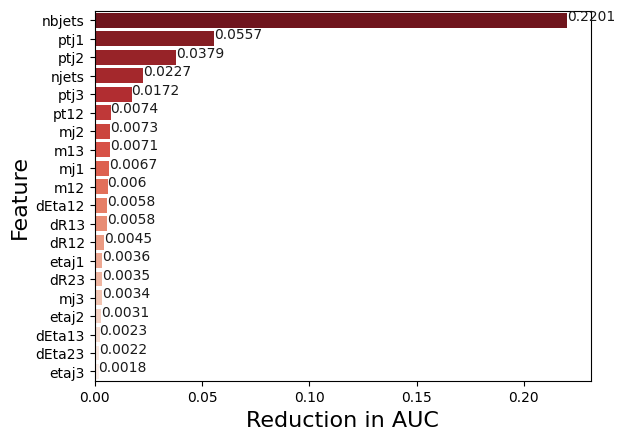

In [123]:
NN_imp = pi_NN_df['Reduction in AUC'].values.tolist()
NN_imp = [round(num, 4) for num in NN_imp]

fig, ax = plt.subplots()
plt.rcParams['savefig.dpi'] = 600
plt.style.use('default')
palette = sns.color_palette("Reds", n_colors=20)
palette.reverse()
sns.barplot(x='Reduction in AUC', y='Feature', data=pi_NN_df.head(20), palette=palette)
plt.xlabel('Reduction in AUC', fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i in range(20):
    text = ax.text(NN_imp[i], i, NN_imp[i], color="k", fontsize='medium')
        
plt.savefig('NN_featureimportance.jpg')

In [95]:
val_loss = []
val_acc = []
val_auc = []
loss = []
acc = []
auc = []
num_features = []

for i in range(1,34):
    select_features_NN = pi_NN_df['Feature'][0:i]
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(i,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer='sgd',
        loss='binary_crossentropy',
        metrics=['accuracy','AUC']
    )
    NN_training = model.fit(X_train_std_df[select_features_NN], y_train, validation_data=(X_test_std_df[select_features_NN], y_test), epochs=10, callbacks=[callback], verbose=0)
    val_loss_min = min(NN_training.history['val_loss'])
    index = NN_training.history['val_loss'].index(val_loss_min)
    val_loss.append(val_loss_min)
    val_acc.append(NN_training.history['val_accuracy'][index])
    val_auc.append(NN_training.history['val_auc'][index])
    loss.append(NN_training.history['loss'][index])
    acc.append(NN_training.history['accuracy'][index])
    auc.append(NN_training.history['auc'][index])
    num_features.append(i)

Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00004: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00009: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00010: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00008: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00009: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00008: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00010: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00009: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00007: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00010: early s

In [96]:
rfe_NN = pd.DataFrame(data={'Number of features':[n for n in range(1,34)],'loss':loss, 'val_loss':val_loss, 'acc':acc, 'val_acc':val_acc, 'auc':auc, 'val_auc':val_auc})
rfe_NN

,Number of features,loss,val_loss,acc,val_acc,auc,val_auc
0,1,0.439773,0.450473,0.772764,0.746086,0.856507,0.856863
1,2,0.341872,0.351455,0.852061,0.843148,0.927408,0.927615
2,3,0.354879,0.343605,0.848946,0.847484,0.923254,0.929587
3,4,0.309386,0.319411,0.861711,0.855738,0.940937,0.939472
4,5,0.302995,0.318419,0.864307,0.853397,0.943321,0.942320
5,6,0.303407,0.313299,0.864404,0.857093,0.943241,0.942537
6,7,0.298406,0.308907,0.867418,0.860991,0.945202,0.944017
7,8,0.297937,0.305809,0.867204,0.861464,0.945361,0.944916
8,9,0.292531,0.302839,0.870339,0.864389,0.947434,0.946509
9,10,0.284293,0.295193,0.875346,0.869559,0.950503,0.950013


# Find minimum number of features that results in maximum scores

[6.4 4.8]


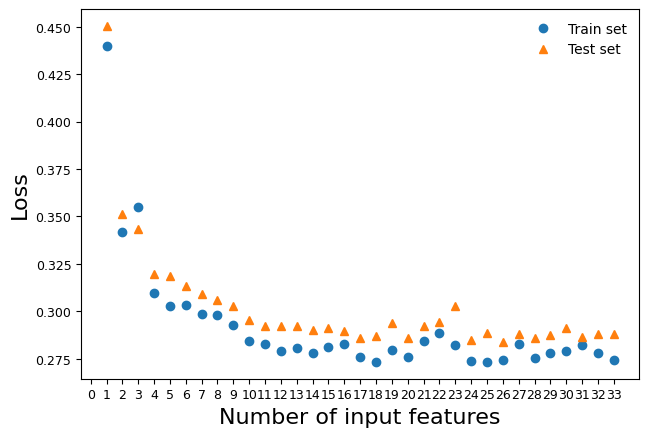

In [105]:
fig, ax = plt.subplots()
size = fig.get_size_inches()
print(size)
fig.set_size_inches(7.2, 4.8)
plt.rcParams['savefig.dpi'] = 600
plt.style.use('default')
plt.plot([n for n in range(1,34)], loss, marker='o', ls='', label='Train set')
plt.plot([n for n in range(1,34)], val_loss, marker='^', ls='', label='Test set')
plt.xlabel('Number of input features', fontsize=16)
plt.ylabel('Loss', fontsize=16)
#plt.ylim((0.8,0.9))
plt.xticks([n for n in range(34)],fontsize=9)
plt.yticks(fontsize=9)
plt.legend()
plt.legend(frameon=False)
plt.savefig('NN_loss_vs_ninputfeatures.jpg')

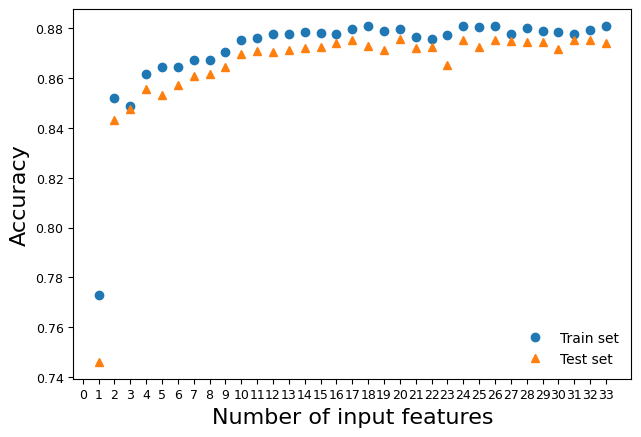

In [106]:
fig, ax = plt.subplots()
fig.set_size_inches(7.2, 4.8)
plt.rcParams['savefig.dpi'] = 600
plt.style.use('default')
plt.plot([n for n in range(1,34)], acc, marker='o', ls='', label='Train set')
plt.plot([n for n in range(1,34)], val_acc, marker='^', ls='', label='Test set')
plt.xlabel('Number of input features', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
#plt.ylim((0.8,0.9))
plt.xticks([n for n in range(34)],fontsize=9)
plt.yticks(fontsize=9)
plt.legend()
plt.legend(frameon=False)
plt.savefig('NN_acc_vs_ninputfeatures.jpg')

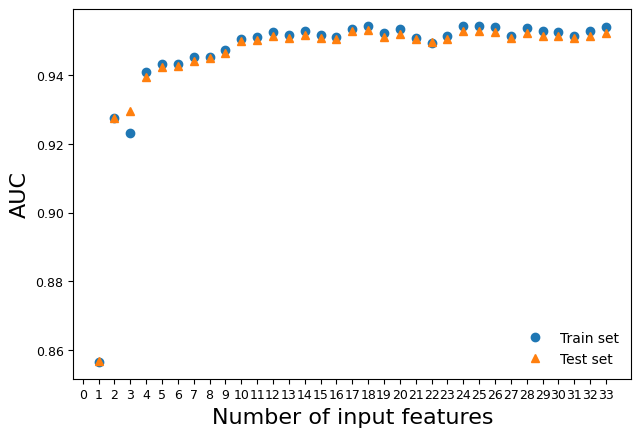

In [107]:
fig, ax = plt.subplots()
fig.set_size_inches(7.2, 4.8)
plt.rcParams['savefig.dpi'] = 600
plt.style.use('default')
plt.plot([n for n in range(1,34)], auc, marker='o', ls='', label='Train set')
plt.plot([n for n in range(1,34)], val_auc, marker='^', ls='', label='Test set')
plt.xlabel('Number of input features', fontsize=16)
plt.ylabel('AUC', fontsize=16)
#plt.ylim((0.8,0.9))
plt.xticks([n for n in range(34)],fontsize=9)
plt.yticks(fontsize=9)
plt.legend()
plt.legend(frameon=False)
plt.savefig('NN_auc_vs_ninputfeatures.jpg')

# Evaluation metrics when train on selected features

In [40]:
select_features_NN = ['nbjets','ptj1','ptj2','njets','ptj3','pt12','mj2','m13','mj1','m12']

def create_model(nn1=100, nn2=50, activation='relu', optimizer='sgd', input_shape=10):
    
    # Create model
    model = Sequential()
    model.add(Dense(nn1, activation=activation, input_shape=(input_shape,)))
    model.add(Dense(nn2, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy','AUC']
    )
    return model

NNn = KerasClassifier(build_fn = create_model, epochs=20)
NNn_training = NNn.fit(X_train_std_df[select_features_NN], y_train, validation_data=(X_test_std_df[select_features_NN], y_test), epochs=10, callbacks=[callback], verbose=1)

Epoch 1/10
8750/8750 [==============================] - 14s 2ms/step - loss: 0.3378 - accuracy: 0.8531 - auc: 0.9310 - val_loss: 0.3250 - val_accuracy: 0.8536 - val_auc: 0.9419
Epoch 2/10
8750/8750 [==============================] - 13s 2ms/step - loss: 0.2986 - accuracy: 0.8696 - auc: 0.9457 - val_loss: 0.3070 - val_accuracy: 0.8629 - val_auc: 0.9460
Epoch 3/10
8750/8750 [==============================] - 12s 1ms/step - loss: 0.2921 - accuracy: 0.8719 - auc: 0.9479 - val_loss: 0.3034 - val_accuracy: 0.8647 - val_auc: 0.9473
Epoch 4/10
8750/8750 [==============================] - 10s 1ms/step - loss: 0.2888 - accuracy: 0.8728 - auc: 0.9490 - val_loss: 0.3045 - val_accuracy: 0.8638 - val_auc: 0.9484
Epoch 5/10
8750/8750 [==============================] - 11s 1ms/step - loss: 0.2860 - accuracy: 0.8739 - auc: 0.9500 - val_loss: 0.2951 - val_accuracy: 0.8688 - val_auc: 0.9493
Epoch 6/10
8750/8750 [==============================] - 13s 1ms/step - loss: 0.2837 - accuracy: 0.8749 - auc: 0.950

In [47]:
NNn.predict(X_test_std_df[select_features_NN])

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]])

In [46]:
NNn.predict_proba(X_test_std_df[select_features_NN])

array([[0.0459851 , 0.9540149 ],
       [0.99006784, 0.00993216],
       [0.32339704, 0.67660296],
       ...,
       [0.4701715 , 0.5298285 ],
       [0.07698804, 0.92301196],
       [0.96436274, 0.03563726]], dtype=float32)

# Performance comparison ROC

In [49]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
select_features_dt = ['nbjets','ptj1','m12','njets','ptj2']
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=1)
dtc.fit(X_train[select_features_dt], y_train)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
select_features_rf = ['nbjets','ptj1','ptj2','m12','njets']
rfc = RandomForestClassifier(n_estimators=50,
                            max_features='sqrt',
                            max_depth=6,
                            max_samples=None,
                            oob_score=True,
                            warm_start=False,
                            random_state=1
                            )
rfc.fit(X_train[select_features_rf],y_train)

#Adaptive Boosting
from sklearn.ensemble import AdaBoostClassifier
select_features_ada = ['ptj1','m12','njets','nbjets','ptj3','mj1','ptj2','mj3']
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3 , random_state=1),n_estimators=50,random_state=1)
abc.fit(X_train[select_features_ada],y_train)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   random_state=1)

In [41]:
from sklearn.metrics import RocCurveDisplay

In [53]:
y_test.to_list()

[1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


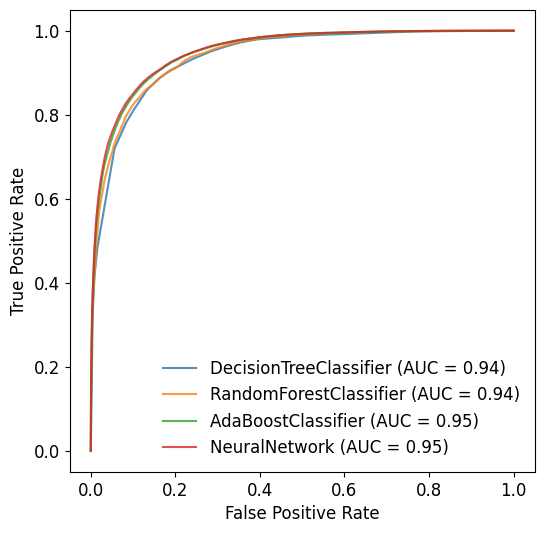

In [65]:
fig, ax = plt.subplots()
plt.rcParams['savefig.dpi']=600
fig.set_size_inches(6,6)
ax = plt.gca()
plt.style.use('default')
dtc_disp = RocCurveDisplay.from_estimator(dtc, X_test[select_features_dt], y_test, ax=ax, alpha=0.8)
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test[select_features_rf], y_test, ax=ax, alpha=0.8)
abc_disp = RocCurveDisplay.from_estimator(abc, X_test[select_features_ada], y_test, ax=ax, alpha=0.8)
nn_disp = RocCurveDisplay.from_predictions(y_test, NNn.predict_proba(X_test_std_df[select_features_NN])[:,-1], ax=ax, alpha=0.8, label='NeuralNetwork (AUC = 0.95)')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(frameon=False, fontsize=12)
plt.savefig('roc.jpg')

# ---------------------------------------------------------------------------------------------------------------